# Lattice or facet charts and small multiples

### Read Tufte Chapter 8

#### "Our eyes can make a remarkable number of distinctions within a small area." -- Tufte

One of Tufte's most enduring ideas is that of Small Multiples, which he describes as frames of a movie. It's creating a series of graphics that show the same thing, but iterated over a value. 

A few examples:

* [As U.S. Life Expectancies Climb, People In A Few Places Are Dying Younger](https://fivethirtyeight.com/features/as-u-s-life-expectancies-climb-people-in-a-few-places-are-dying-younger/)
* [275 California drought maps show deep drought and recovery](http://www.latimes.com/local/lanow/la-me-g-california-drought-map-htmlstory.html)

Think of it like this: What if we made a chart for each of the 5 largest crimes on campus, showing a count by month for each over 5 years? 

In [1]:
library(lubridate)
library(dplyr)
library(ggplot2)

unlcrime <- read.csv("../../Data/unlcrime.csv", na.string = "NA")

head(unlcrime)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘dplyr’

The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



CaseNo,Incident.Code,Reported,Case.Status,Start.Occurred,End.Occurred,Building,Location,Stolen,Damaged,Description
11000001,NARCOTICS - POSSESSION,2011-01-01T00:10:00,Cleared by Arrest,2011-01-01T00:10:00,,515 N 19th Parking Lot Vine to,515 North 19th St. (GOV'T PARKING LOT (UNL)),NA,NA,UNL student cited and released for Poss of Marijuana < 1 oz and Poss of Drug Paraphernalia after a CSO reported suspicious drug-related activity from a vehicle. 1.2 g of marijuana seized.
11000011,NARCOTICS - POSSESSION,2011-01-01T23:16:00,Cleared by Arrest,2011-01-01T23:16:00,,,N 10TH ST & CHARLESTON ST (STREET),NA,NA,Traffic Stop. Vehicle stopped for a headlight out. Upon contact Officer smelled the strong odor of burnt marijuana. Driver cited/released for Possession of Drug Paraphernalia after a search yielded a pipe with burnt marijuana residue.
11000013,ALCOHOL - MINOR IN POSSESSION,2011-01-02T00:38:00,Cleared by Arrest,2011-01-02T00:38:00,,,N 17TH ST & N ANTELOPE VALLEY PKWY (STREET),NA,NA,Three persons cited for MIPC after being stopped for no headlights at N. Antelope valley parkway and N. 17rh Street.
11000019,TRAFFIC - SUSPENDED DRIVER,2011-01-02T23:24:00,Cleared by Arrest,2011-01-02T23:24:00,,,N 17TH ST & VINE ST (STREET),NA,NA,Non-student cited and lodged in jail for Driving Under Suspension after being stopped for speeding.
11000020,NARCOTICS - POSSESSION,2011-01-03T04:46:00,Cleared by Arrest,2011-01-03T04:46:00,,,N 10TH ST & CHARLESTON ST (STREET),NA,NA,"Non-student stopped for speeding. Officer smelled burnt marijuana from within the vehicle and upon searching located burnt marijuana cigarettes, a pipe, and .6 g of marijuana. Cited and released for Speeding, Poss of Marijuana < 1 oz, and Poss of Drug Paraphernalia."
11000022,MEDICAL EMERGENCY,2011-01-03T10:34:00,Inactive,2011-01-03T10:34:00,,Campus Recreation Center,841 North 14th St (SPORT FACILITIES),NA,NA,UNL affiliated female disoriented in need of medical attention at the Rec Center. Transported to the hospital by LFR.


Let's first figure out what the top five UNLPD calls are. 

In [23]:
crimes <- unlcrime %>% group_by(Incident.Code) %>%
summarize(
        count = n()
    ) %>% 
arrange(desc(count)) %>% 
top_n(5)

head(crimes)

Selecting by count


Incident.Code,count
ALCOHOL - MINOR IN POSSESSION,1138
MEDICAL EMERGENCY,951
TRAFFIC - SUSPENDED DRIVER,945
NARCOTICS - POSSESSION,877
ALCOHOL - DWI,651


Now we can filter those out to create our data.

In [4]:
crimesbymonth <- unlcrime %>%
filter(Incident.Code == "ALCOHOL - MINOR IN POSSESSION" | Incident.Code == "MEDICAL EMERGENCY" | Incident.Code == "TRAFFIC - SUSPENDED DRIVER" | Incident.Code == "NARCOTICS - POSSESSION" | Incident.Code == "ALCOHOL - DWI") %>%
mutate(
    shortdate = format(as.POSIXct(Reported, format="%Y-%m-%d")),
    month = floor_date(ymd(shortdate), "month"),
) %>% 
group_by(Incident.Code, month) %>%
summarize(
        count = n()
    )


The new bits we're going to learn today is the `facet_wrap` where we tell ggplot, essentially, make a new chart for each one of these things. **Note: Your facet cannot be a date. To use years or months, you'll have to create one in your data.**

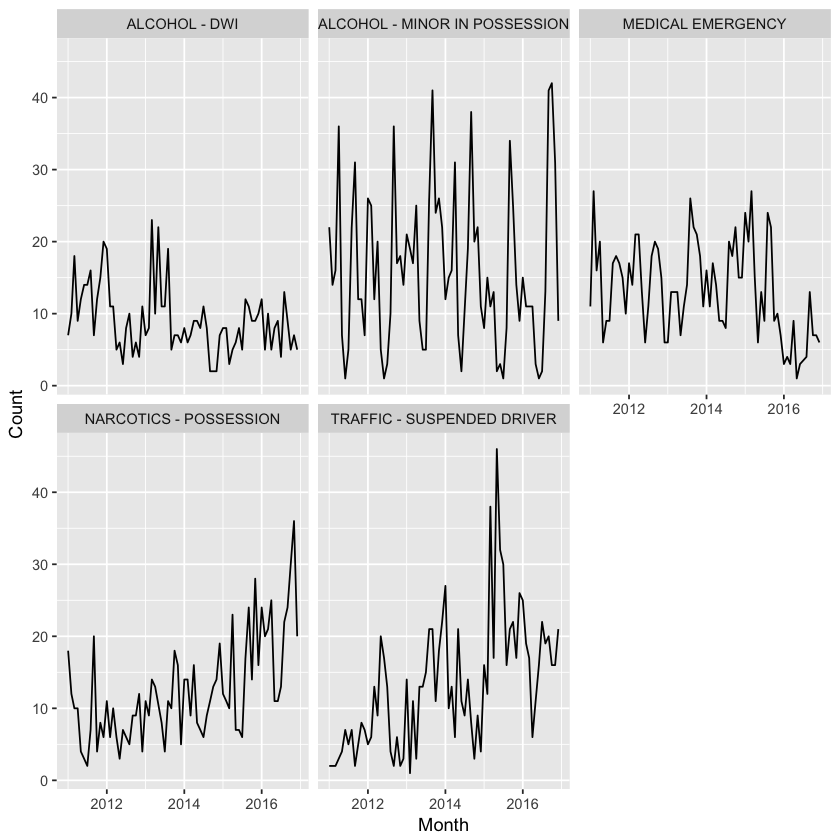

In [10]:
ggplot(crimesbymonth, aes(x=month, y=count, group=1)) +
   geom_line() + labs(x="Month", y="Count") + facet_wrap(~Incident.Code)

### In class challenge: Make a facet chart. 

What else could you do with this? Look at the previous data we've worked with. What could you do with your existing data and existing charts? What could be improved through small multiples? Examples: The prison data, the majors by race and sex data, the parking tickets data. 

In [11]:
tickets <- read.csv("../../Data/tickets.csv", stringsAsFactors = FALSE)

In [12]:
head(tickets)

Citation,Date,Location,Violation
15078429,2012-04-02 07:15:00,North Stadium,Expired Meter
24048318,2012-04-02 07:22:00,Housing,No Valid Permit Displayed
24048320,2012-04-02 07:26:00,14th & W Street,No Valid Permit Displayed
15078430,2012-04-02 07:36:00,Champions Club,Parking in Unauthorized Area
18074937,2012-04-02 07:39:00,Sandoz,Expired Meter
18074938,2012-04-02 07:40:00,Sandoz,Expired Meter


In [21]:
ticketscount <- tickets %>% mutate(
    CleanDate = ymd_hms(Date),
    month = floor_date(CleanDate, "month"),
) %>% 
group_by(Location, month) %>%
summarize(
        count = n()
    ) %>%
mutate(
    year = format(as.Date(month, format="%Y/%m/%d"),"%Y")
)


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path:

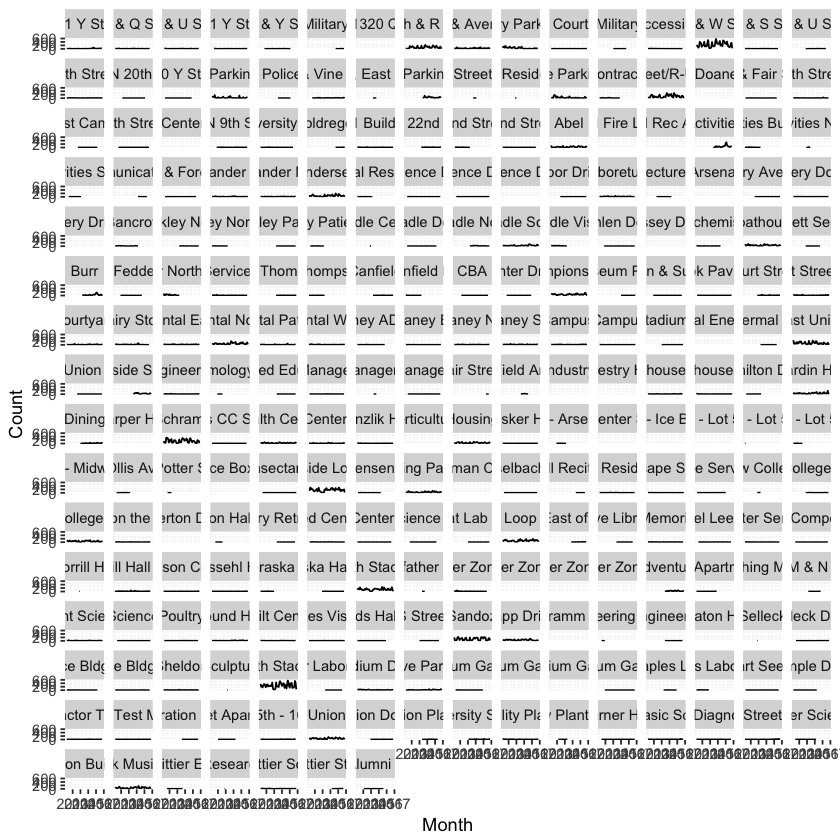

In [22]:
ggplot(ticketscount, aes(x=month, y=count, group=1)) +
   geom_line() + labs(x="Month", y="Count") + facet_wrap(~Location)